<a href="https://colab.research.google.com/github/rul124/Capstone-MSED/blob/main/MESD_Exploration.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os
import librosa
import librosa.display
from IPython.display import Audio

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
# Define path to datasets
DATA_NATURAL = "/content/drive/MyDrive/MESD/MESD_All"

## GET SAMPLE

In [ ]:
SAMPLE_FILE = '/Anger_C_A_abajo.wav'

# load the audio file to get the sample
samples, sample_rate = librosa.load(DATA_NATURAL + SAMPLE_FILE, sr = None)

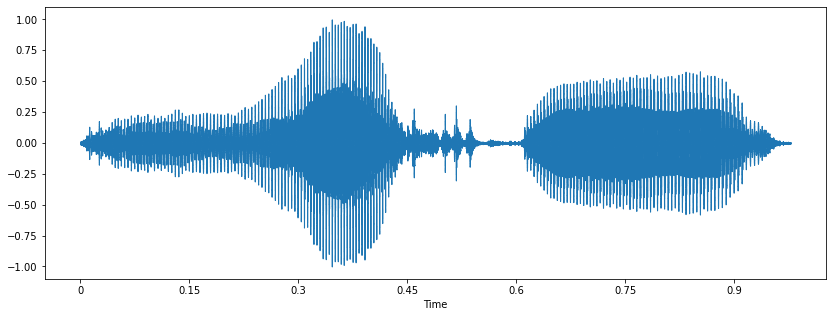

In [ ]:
# visualize the sound wave
plt.figure(figsize = (14, 5))
librosa.display.waveshow(samples, sr = sample_rate)

In [ ]:
# play the audio directly
Audio(DATA_NATURAL + SAMPLE_FILE)

In [ ]:
print ('Sample shape ', samples.shape, 'Sample rate ', sample_rate, 'Data type', type(samples))

Sample shape  (46924,) Sample rate  48000 Data type <class 'numpy.ndarray'>


/usr/local/lib/python3.7/dist-packages/librosa/display.py:955: UserWarning: Trying to display complex-valued input. Showing magnitude instead.
  "Trying to display complex-valued input. " "Showing magnitude instead."


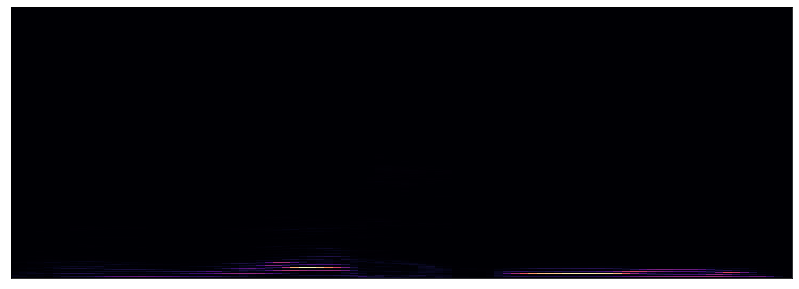

In [ ]:
# Spectrograms: plot frequency vs time to indicate the Amplitude of each frequency
plt.figure(figsize = (14, 5))
sgram = librosa.stft(samples)
librosa.display.specshow(sgram)

<Figure size 1008x360 with 0 Axes>

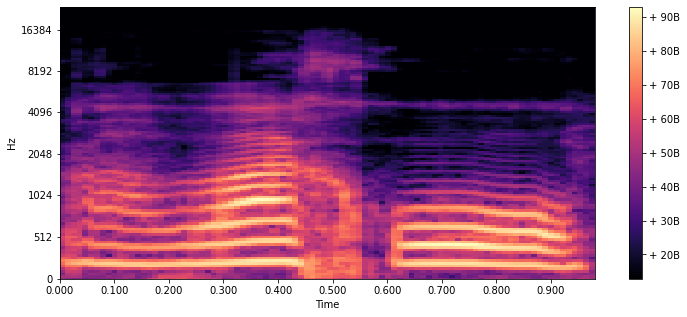

In [ ]:
# Modify the to use Mel Scale (a scale of pitches, s.t. each unit is judged by listeners to be equal in pitches distance from the next) instead of Frequency
plt.figure(figsize = (14, 5))
sgram_mag, _ = librosa.magphase(sgram)
mel_scale_sgram = librosa.feature.melspectrogram(S = sgram_mag, sr = sample_rate)
# use the decibel scale to get the final Mel Spectrogram
plt.figure(figsize = (12, 5))
mel_sgram = librosa.amplitude_to_db(mel_scale_sgram, ref=np.min)
librosa.display.specshow(mel_sgram, sr=sample_rate, x_axis='time', y_axis='mel')
plt.colorbar(format='+% dB')

## OVERALL EXPLORATION

In [ ]:
entries = os.listdir(DATA_NATURAL)

In [ ]:
dataset = []
for entry in entries:
    entryArr = entry.split("_")
    if len(entryArr) != 4:
        continue
    dataset.append([])
    dataset[-1].append(entry)
    dataset[-1].append(entryArr[0]) # emotion
    dataset[-1].append(entryArr[1]) # gender
    dataset[-1].append(entryArr[3].split(".")[0]) # word

In [ ]:
df = pd.DataFrame(dataset, columns=['filename', 'emotion', 'gender', 'word'])

In [ ]:
df.head(5)

,filename,emotion,gender,word
0,Anger_C_B_alterado.wav,Anger,C,alterado
1,Anger_F_A_pronto.wav,Anger,F,pronto
2,Anger_C_A_derecha.wav,Anger,C,derecha
3,Anger_C_B_ataque.wav,Anger,C,ataque
4,Anger_F_A_ayer.wav,Anger,F,ayer


In [ ]:
num_data = len(df)
num_emotion = len(df['emotion'].unique())
num_gender = len(df['gender'].unique())
num_words = len(df['word'].unique())
print(f'There are total of {num_data} audio pieces.')
print(f'Number of emotions: {num_emotion}')
print(f'Number of genders: {num_gender}')
print(f'Number of words: {num_words}')

There are total of 807 audio pieces.
Number of emotions: 6
Number of genders: 3
Number of words: 201


In [ ]:
# gender exploration
df['gender'].value_counts()

F    270
M    270
C    267
Name: gender, dtype: int64

In [ ]:
# emotion exploration
df['emotion'].value_counts()

Disgust      135
Fear         135
Sadness      135
Anger        134
Happiness    134
Neutral      134
Name: emotion, dtype: int64

In [ ]:
df['emotion'].unique()

array(['Anger', 'Disgust', 'Fear', 'Happiness', 'Sadness', 'Neutral'],
      dtype=object)

In [ ]:
df['audio_len'] = 0
df['sample_rate'] = 0

for i in range(len(df)):
  entry = df.iloc[i,0]
  file_path = DATA_NATURAL +'/'+ entry
  sample, sample_rate = librosa.load(file_path, sr = None)
  df.iloc[i, -2] = len(sample)
  df.iloc[i, -1] = sample_rate

In [ ]:
df.head()

,filename,emotion,gender,word,audio_len,sample_rate
0,Anger_C_B_alterado.wav,Anger,C,alterado,37505,48000
1,Anger_F_A_pronto.wav,Anger,F,pronto,35913,48000
2,Anger_C_A_derecha.wav,Anger,C,derecha,46354,48000
3,Anger_C_B_ataque.wav,Anger,C,ataque,31923,48000
4,Anger_F_A_ayer.wav,Anger,F,ayer,34552,48000


In [ ]:
min_length = df['audio_len'].min()
max_length = df['audio_len'].max()
print(f'Minimum length of data: {min_length}')
print(f'Maximum length of data: {max_length}')

Minimum length of data: 9554
Maximum length of data: 111922


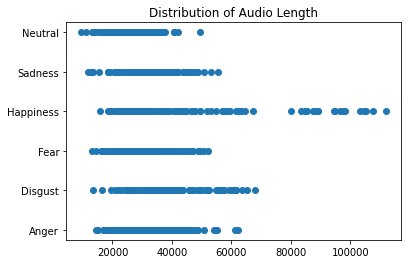

In [ ]:
# Audio Length
plt.plot(df['audio_len'], df['emotion'], 'o')
plt.title("Distribution of Audio Length")
plt.show()

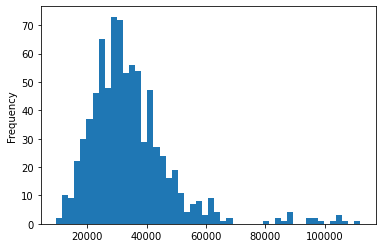

In [ ]:
df['audio_len'].plot.hist(bins = 50) #(bins=12, alpha=0.5)
plt.show()

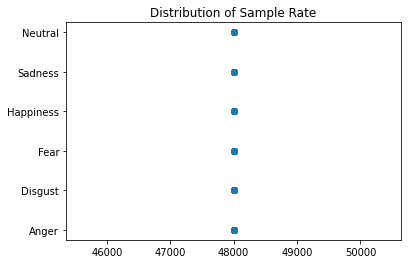

In [ ]:
# Sample Rate
plt.plot(df['sample_rate'], df['emotion'], 'o')
plt.title("Distribution of Sample Rate")
plt.show()

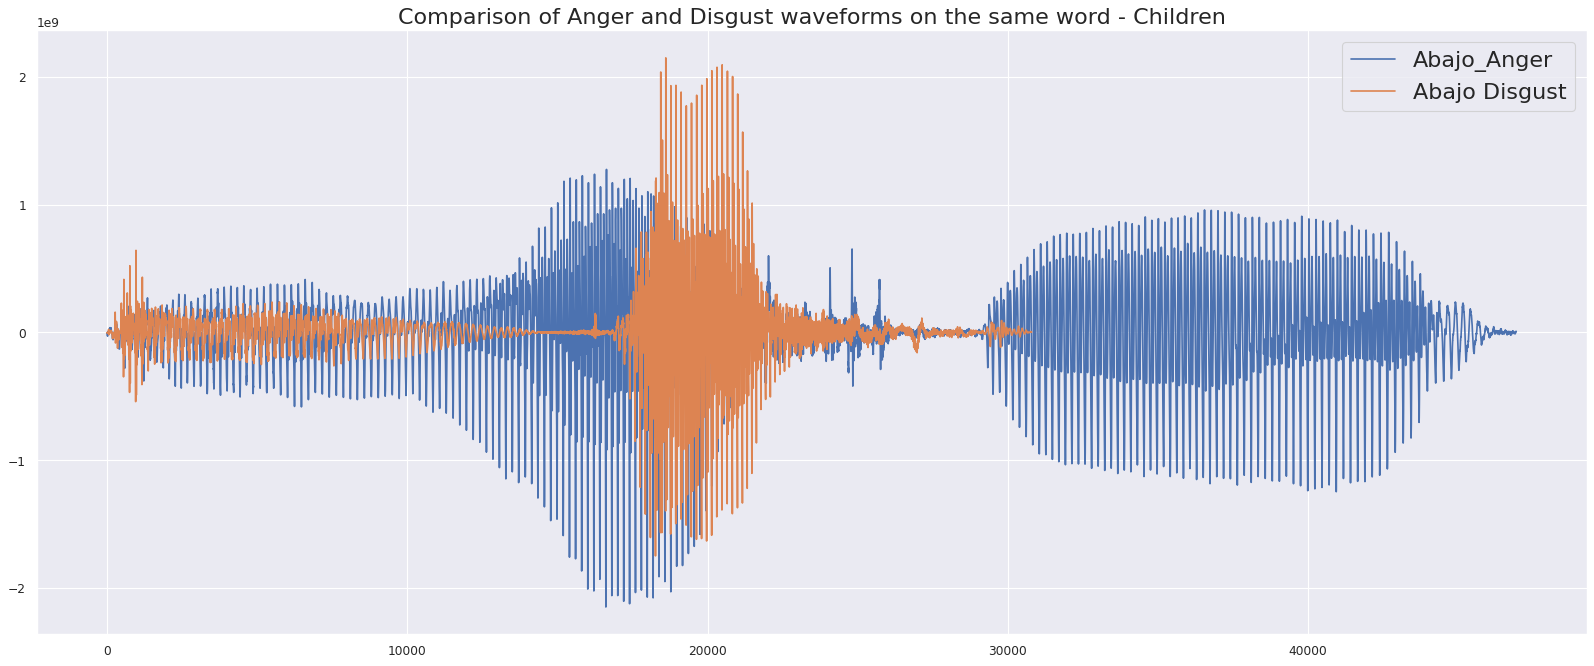

In [ ]:
from scipy.io import wavfile

sns.set()
sample_rate_anger, data_anger = wavfile.read(DATA_NATURAL + "/Anger_C_A_abajo.wav")
sample_rate_disgust, data_disgust = wavfile.read(DATA_NATURAL + "/Disgust_C_A_abajo.wav")

plt.figure(figsize=(25, 10), dpi=80)
plt.plot(data_anger, label = "Abajo_Anger")
plt.plot(data_disgust, label = "Abajo Disgust")

plt.title("Comparison of Anger and Disgust waveforms on the same word - Children", fontsize = 20)
plt.legend(fontsize = 20)
plt.show()

## Baseline (Naive) Model for Inference

As we want to have a baseline model accuracy for future comparison, we shall try training several models such as Logistic Regression, Random Forest, and XGBoost as our initial tries.

In [ ]:
from time import time
from tqdm import tqdm

start = time()
waves = {}
for entry in entries:
    if entry == "desktop.ini":
        continue
    waves[entry] = wavfile.read(DATA_NATURAL + "/" + entry)[1]
end = time()

print(f'Total time consumed: {round(end - start)} sec.')

Total time consumed: 2 sec.


In [ ]:
print("First 5 files and values we got:")
for file_path in list(waves.keys())[:5]:
    print(file_path, ":", waves[file_path])

First 5 files and values we got:
Anger_C_B_alterado.wav : [29895936 30437632 30673408 ...  8057088  7708672  6051584]
Anger_C_A_por_favor.wav : [ 630784  500480  -28672 ... 2816512 1644288 -911872]
Anger_F_A_pronto.wav : [   392192    -40704    311040 ... -35755776 -34901504 -34401024]
Anger_C_A_derecha.wav : [-360960   99328  116480 ... 2265088 3144704 4089088]
Anger_C_B_ataque.wav : [ 18314752  20035072  24252672 ... -17529856 -16034560 -15450624]


Considering what we should feed to our models, we think of having moments of several orders on our waveforms. And in order to have multiple choices, we could use order from $2$ ($\mathbb{E}[X^2]$) to order $5$ ($\mathbb{E}[X^5]$)

In [ ]:
from scipy.stats import moment

def compute_moment(wave, m = 1):
    return moment(wave, m)

anger_moment_2 = compute_moment(data_anger/10**8, 2)
print(f'Example of inputting Anger sample we got previously: {anger_moment_2}')

Example of inputting Anger sample we got previously: 15.07101795574352


In [ ]:
df_naive = df.copy() # we want to have a copy of df for naive model training
DIVISION = 10**8
for m in tqdm(range(2, 6)):
    df_naive[f'moment_{m}'] = 0
    for i in range(len(df_naive)):
        wav = waves[df_naive.iloc[i, 0]]/DIVISION
        df_naive.iloc[i, -1] = compute_moment(wav, m)

100%|██████████| 4/4 [00:02<00:00,  1.40it/s]


In [ ]:
df_naive.head(5)

,filename,emotion,gender,word,audio_len,sample_rate,moment_2,moment_3,moment_4,moment_5
0,Anger_C_B_alterado.wav,Anger,C,alterado,37505,48000,22.671225,-6.626947,2694.931509,-4074.116770
1,Anger_F_A_pronto.wav,Anger,F,pronto,35913,48000,48.838532,-7.113594,7888.265408,4174.728923
2,Anger_C_A_derecha.wav,Anger,C,derecha,46354,48000,18.908284,-72.390323,2510.623765,-22970.263692
3,Anger_C_B_ataque.wav,Anger,C,ataque,31923,48000,22.986613,-31.225281,3067.378459,-11578.420430
4,Anger_F_A_ayer.wav,Anger,F,ayer,34552,48000,30.904391,-126.008020,3651.063744,-31409.509499


In [ ]:
# Encode emotion categories as integer
df_naive['emotion_ordinal'] = df_naive['emotion'].astype('category').cat.codes
df_naive.head(5)

,filename,emotion,gender,word,audio_len,sample_rate,moment_2,moment_3,moment_4,moment_5,emotion_ordinal
0,Anger_C_B_alterado.wav,Anger,C,alterado,37505,48000,22.671225,-6.626947,2694.931509,-4074.116770,0
1,Anger_F_A_pronto.wav,Anger,F,pronto,35913,48000,48.838532,-7.113594,7888.265408,4174.728923,0
2,Anger_C_A_derecha.wav,Anger,C,derecha,46354,48000,18.908284,-72.390323,2510.623765,-22970.263692,0
3,Anger_C_B_ataque.wav,Anger,C,ataque,31923,48000,22.986613,-31.225281,3067.378459,-11578.420430,0
4,Anger_F_A_ayer.wav,Anger,F,ayer,34552,48000,30.904391,-126.008020,3651.063744,-31409.509499,0


### Naive Model Training Part

Step1 : Split the data into Train and Test

In [ ]:
from sklearn.model_selection import train_test_split

moments = [f'moment_{i}' for i in range(2, 6)]
X_train, X_test, y_train, y_test = train_test_split(df_naive[moments], df_naive['emotion_ordinal'], test_size=0.2, random_state=4800)

#### Model1: Logistic Regression

In [ ]:
from sklearn.linear_model import LogisticRegression

lr = LogisticRegression(multi_class='multinomial', max_iter=3000)
lr.fit(X_train, y_train)
lr_score = lr.score(X_test, y_test)

#### Model2: Random Forest

In [ ]:
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier().fit(X_train, y_train)
rf_score = rf.score(X_test, y_test)

#### Model3: XGBoost

In [ ]:
import xgboost

xgb = xgboost.XGBClassifier().fit(X_train, y_train)
xgb_score = xgb.score(X_test, y_test)

In [ ]:
print("------------ Accuracy under Models ------------")
print(f'Logistic Regression Accuracy: {lr_score}')
print(f'Random Forest Accuracy: {rf_score}')
print(f'XGBoost Accuracy: {xgb_score}')

------------ Accuracy under Models ------------
Logistic Regression Accuracy: 0.24691358024691357
Random Forest Accuracy: 0.25925925925925924
XGBoost Accuracy: 0.24074074074074073


## Transformers Approach

In [ ]:
from transformers import AutoFeatureExtractor

model_checkpoint = 'facebook/wav2vec2-large-xlsr-53-spanish'

feature_extractor = AutoFeatureExtractor.from_pretrained(model_checkpoint)

Downloading:   0%|          | 0.00/1.26k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/158 [00:00<?, ?B/s]

In [ ]:
import datasets


In [ ]:
df_naive[['filename', 'emotion_ordinal']]

,filename,emotion_ordinal
0,Anger_C_B_alterado.wav,0
1,Anger_F_A_pronto.wav,0
2,Anger_C_A_derecha.wav,0
3,Anger_C_B_ataque.wav,0
4,Anger_F_A_ayer.wav,0
...,...,...
802,Sadness_F_A_izquierda.wav,5
803,Sadness_M_A_no.wav,5
804,Sadness_C_B_robo.wav,5
805,Sadness_M_A_lento.wav,5


In [ ]:
df_tf = df_naive[['filename']].apply(lambda x: DATA_NATURAL + '/' + x)
df_tf['intent_class'] = df_naive['emotion_ordinal']
df_tf.rename(columns = {'filename':'audio'}, inplace = True)
df_tf.head(5)

,audio,intent_class
0,/content/drive/MyDrive/MESD/MESD_All/Anger_C_B...,0
1,/content/drive/MyDrive/MESD/MESD_All/Anger_F_A...,0
2,/content/drive/MyDrive/MESD/MESD_All/Anger_C_A...,0
3,/content/drive/MyDrive/MESD/MESD_All/Anger_C_B...,0
4,/content/drive/MyDrive/MESD/MESD_All/Anger_F_A...,0


In [ ]:
import datasets
emotions = ['Anger', 'Disgust', 'Fear', 'Happiness', 'Sadness', 'Neutral']
features = datasets.Features({"audio": datasets.Audio(),
                              "intent_class": datasets.ClassLabel(num_classes=6, 
                                                                  names=emotions)}
                             )
mesd = datasets.Dataset.from_pandas(df_tf, features = features).cast_column("audio", 
                                                                         datasets.Audio(sampling_rate=16_000))
mesd

Dataset({
    features: ['audio', 'intent_class'],
    num_rows: 807
})

In [ ]:
mesd['audio'][:5]

[{'path': '/content/drive/MyDrive/MESD/MESD_All/Anger_C_B_alterado.wav',
  'array': array([0.00925647, 0.01516087, 0.01115045, ..., 0.00607736, 0.00480043,
         0.        ], dtype=float32),
  'sampling_rate': 16000},
 {'path': '/content/drive/MyDrive/MESD/MESD_All/Anger_F_A_pronto.wav',
  'array': array([ 5.8242320e-05,  1.4733062e-04,  2.0109385e-04, ...,
         -1.6648835e-02, -1.7623561e-02, -1.7936284e-02], dtype=float32),
  'sampling_rate': 16000},
 {'path': '/content/drive/MyDrive/MESD/MESD_All/Anger_C_A_derecha.wav',
  'array': array([-2.4977873e-05,  1.5516731e-05, -8.9861176e-05, ...,
          1.1672139e-03,  9.0955035e-04,  0.0000000e+00], dtype=float32),
  'sampling_rate': 16000},
 {'path': '/content/drive/MyDrive/MESD/MESD_All/Anger_C_B_ataque.wav',
  'array': array([ 0.00557929,  0.01348805,  0.00808243, ..., -0.00616291,
         -0.00677305, -0.0084984 ], dtype=float32),
  'sampling_rate': 16000},
 {'path': '/content/drive/MyDrive/MESD/MESD_All/Anger_F_A_ayer.wav'

In [ ]:
mesd = mesd.train_test_split(test_size=0.2)
mesd

DatasetDict({
    train: Dataset({
        features: ['audio', 'intent_class'],
        num_rows: 645
    })
    test: Dataset({
        features: ['audio', 'intent_class'],
        num_rows: 162
    })
})

In [ ]:
labels = mesd["train"].features["intent_class"].names

label2id, id2label = dict(), dict()

for i, label in enumerate(labels):

    label2id[label] = str(i)

    id2label[str(i)] = label

id2label[str(0)]

'Anger'

In [ ]:
def preprocess_function(examples):

    audio_arrays = [x["array"] for x in examples["audio"]]

    inputs = feature_extractor(

        audio_arrays, sampling_rate=feature_extractor.sampling_rate, max_length=16000, truncation=True

    )

    return inputs

In [ ]:
encoded_mesd = mesd.map(preprocess_function, remove_columns="audio", batched=True)
encoded_mesd = encoded_mesd.rename_column("intent_class", "label")

  0%|          | 0/1 [00:00<?, ?ba/s]

/usr/local/lib/python3.7/dist-packages/transformers/feature_extraction_utils.py:158: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  tensor = as_tensor(value)


  0%|          | 0/1 [00:00<?, ?ba/s]

In [ ]:
from transformers import AutoModelForAudioClassification, TrainingArguments, Trainer

num_labels = len(id2label)
model = AutoModelForAudioClassification.from_pretrained(
    model_checkpoint, 
    num_labels=num_labels,
    label2id=label2id,
    id2label=id2label,
)

Downloading:   0%|          | 0.00/1.18G [00:00<?, ?B/s]

Some weights of the model checkpoint at facebook/wav2vec2-large-xlsr-53-spanish were not used when initializing Wav2Vec2ForSequenceClassification: ['lm_head.weight', 'lm_head.bias']
- This IS expected if you are initializing Wav2Vec2ForSequenceClassification from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing Wav2Vec2ForSequenceClassification from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
Some weights of Wav2Vec2ForSequenceClassification were not initialized from the model checkpoint at facebook/wav2vec2-large-xlsr-53-spanish and are newly initialized: ['classifier.weight', 'projector.bias', 'classifier.bias', 'projector.weight']
You should probably TRAIN this model on a down-stream task to be able t

In [ ]:
model_name = model_checkpoint.split("/")[-1]

batch_size = 8

args = TrainingArguments(
    output_dir="./results",
    evaluation_strategy = "epoch",
    save_strategy = "epoch",
    learning_rate=3e-2,
    per_device_train_batch_size=batch_size,
    gradient_accumulation_steps=4,
    per_device_eval_batch_size=batch_size,
    num_train_epochs=5,
    warmup_ratio=0.1,
    logging_steps=10,
    load_best_model_at_end=True,
    metric_for_best_model="accuracy"
)

In [ ]:
import numpy as np
from datasets import load_metric
metric = load_metric("accuracy")

def compute_metrics(eval_pred):
    """Computes accuracy on a batch of predictions"""
    predictions = np.argmax(eval_pred.predictions, axis=1)
    return metric.compute(predictions=predictions, references=eval_pred.label_ids)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: FutureWarning: load_metric is deprecated and will be removed in the next major version of datasets. Use 'evaluate.load' instead, from the new library 🤗 Evaluate: https://huggingface.co/docs/evaluate
  This is separate from the ipykernel package so we can avoid doing imports until


In [ ]:
trainer = Trainer(
    model,
    args,
    train_dataset=encoded_mesd["train"],
    eval_dataset=encoded_mesd["test"],
    tokenizer=feature_extractor,
    compute_metrics=compute_metrics
)

trainer.train()

***** Running training *****
  Num examples = 645
  Num Epochs = 5
  Instantaneous batch size per device = 8
  Total train batch size (w. parallel, distributed & accumulation) = 32
  Gradient Accumulation steps = 4
  Total optimization steps = 100
/usr/local/lib/python3.7/dist-packages/transformers/feature_extraction_utils.py:158: UserWarning: Creating a tensor from a list of numpy.ndarrays is extremely slow. Please consider converting the list to a single numpy.ndarray with numpy.array() before converting to a tensor. (Triggered internally at  ../torch/csrc/utils/tensor_new.cpp:201.)
  tensor = as_tensor(value)
/usr/local/lib/python3.7/dist-packages/transformers/models/wav2vec2/modeling_wav2vec2.py:882: UserWarning: __floordiv__ is deprecated, and its behavior will change in a future version of pytorch. It currently rounds toward 0 (like the 'trunc' function NOT 'floor'). This results in incorrect rounding for negative values. To keep the current behavior, use torch.div(a, b, rounding

Epoch,Training Loss,Validation Loss,Accuracy
0,6.762300,7.070736,0.203704
1,2.760300,1.821176,0.203704
2,1.888300,1.897623,0.135802
3,1.822400,1.791770,0.203704
4,1.806700,1.818688,0.160494


***** Running Evaluation *****
  Num examples = 162
  Batch size = 8
Saving model checkpoint to ./results/checkpoint-20
Configuration saved in ./results/checkpoint-20/config.json
Model weights saved in ./results/checkpoint-20/pytorch_model.bin
Configuration saved in ./results/checkpoint-20/preprocessor_config.json
/usr/local/lib/python3.7/dist-packages/transformers/models/wav2vec2/modeling_wav2vec2.py:882: UserWarning: __floordiv__ is deprecated, and its behavior will change in a future version of pytorch. It currently rounds toward 0 (like the 'trunc' function NOT 'floor'). This results in incorrect rounding for negative values. To keep the current behavior, use torch.div(a, b, rounding_mode='trunc'), or for actual floor division, use torch.div(a, b, rounding_mode='floor').
  return (input_length - kernel_size) // stride + 1
***** Running Evaluation *****
  Num examples = 162
  Batch size = 8
Saving model checkpoint to ./results/checkpoint-40
Configuration saved in ./results/checkpoin

TrainOutput(global_step=100, training_loss=2.9538604545593263, metrics={'train_runtime': 9006.7186, 'train_samples_per_second': 0.358, 'train_steps_per_second': 0.011, 'total_flos': 9.333818340912978e+16, 'train_loss': 2.9538604545593263, 'epoch': 4.99})